<a href="https://colab.research.google.com/github/bobby6007/PortfolioProjects/blob/main/05_ml_07_LinerRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('05-ml-07-linerregression')
jovian.set_colab_id('13jMmOF69Zua6ZOAaX6PCSimQOUcSzY7O')

     |████████████████████████████████| 68 kB 3.2 MB/s 


![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning. 

### Linear Regression

In [4]:
import pandas as pd
df = pd.read_csv('/content/cleaned_tashkent_housing', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
location,,,,,,
"город Ташкент, Юнусабадский район, Юнусабад 8-й квартал",Юнусабадский,3,57,4,4,52000
"город Ташкент, Яккасарайский район, 1-й тупик Шота Руставели",Яккасарайский,2,52,4,5,56000
"город Ташкент, Чиланзарский район, Чиланзар 2-й квартал",Чиланзарский,2,42,4,4,37000
"город Ташкент, Чиланзарский район, Чиланзар 9-й квартал",Чиланзарский,3,65,1,4,49500
"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
"город Ташкент, Чиланзарский район, Чиланзар 6-й квартал",Чиланзарский,1,28,1,4,25500
"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30,2,4,21200
"город Ташкент, Яккасарайский район, Саламатина",Яккасарайский,2,32,5,5,20000
"город Ташкент, Учтепинский район, Чиланзар-21",Учтепинский,2,51,3,4,26200


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

In [5]:
df['district'].value_counts()

Чиланзарский         1627
Мирзо-Улугбекский    1359
Учтепинский           870
Юнусабадский          859
Мирабадский           755
Яккасарайский         642
Яшнободский           460
Шайхантахурский       363
Олмазорский           264
Сергелийский          158
Янгихаётский           14
Бектемирский            8
Name: district, dtype: int64

**Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz**

In [6]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
location,,,,,,
"город Ташкент, Чиланзарский район, Чиланзар 2-й квартал",Чиланзарский,2,42,4,4,37000
"город Ташкент, Чиланзарский район, Чиланзар 9-й квартал",Чиланзарский,3,65,1,4,49500
"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
"город Ташкент, Чиланзарский район, Чиланзар 6-й квартал",Чиланзарский,1,28,1,4,25500
"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30,2,4,21200


In [7]:
X = housing['size']
X

location
город Ташкент, Чиланзарский район, Чиланзар 2-й квартал    42
город Ташкент, Чиланзарский район, Чиланзар 9-й квартал    65
город Ташкент, Чиланзарский район, площадь Актепа          70
город Ташкент, Чиланзарский район, Чиланзар 6-й квартал    28
город Ташкент, Чиланзарский район, Чиланзар-16             30
                                                           ..
город Ташкент, Чиланзарский район, Мукими                  70
город Ташкент, Чиланзарский район, проспект Бунёдкор       20
город Ташкент, Чиланзарский район, Чиланзар 1 квартал      32
город Ташкент, Чиланзарский район, Чиланзар-16             70
город Ташкент, Чиланзарский район, Чиланзар 6-й квартал    30
Name: size, Length: 1627, dtype: int64

In [8]:
y = housing['price']
y

location
город Ташкент, Чиланзарский район, Чиланзар 2-й квартал    37000
город Ташкент, Чиланзарский район, Чиланзар 9-й квартал    49500
город Ташкент, Чиланзарский район, площадь Актепа          55000
город Ташкент, Чиланзарский район, Чиланзар 6-й квартал    25500
город Ташкент, Чиланзарский район, Чиланзар-16             21200
                                                           ...  
город Ташкент, Чиланзарский район, Мукими                  48000
город Ташкент, Чиланзарский район, проспект Бунёдкор       18500
город Ташкент, Чиланзарский район, Чиланзар 1 квартал      28000
город Ташкент, Чиланзарский район, Чиланзар-16             49800
город Ташкент, Чиланзарский район, Чиланзар 6-й квартал    22914
Name: price, Length: 1627, dtype: int64

**Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

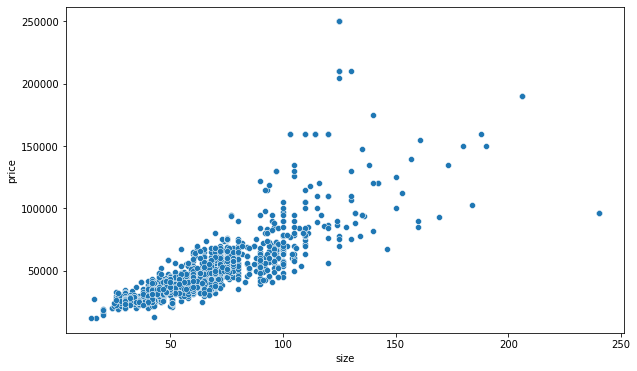

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

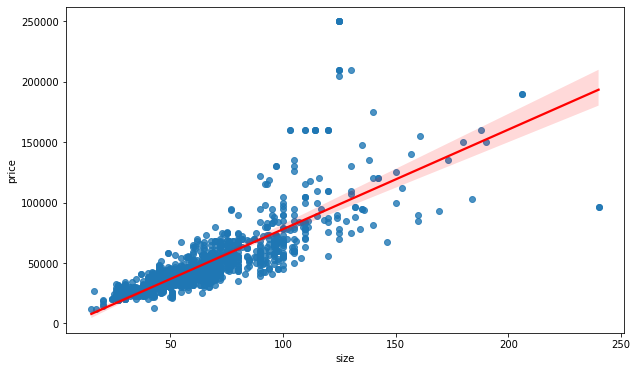

In [11]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

## 1-Vazifa
Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

In [27]:
Xmean = np.mean(X)
ymean = np.mean(y)

In [30]:
theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
theta1

825.2519172433614

In [32]:
theta0=(ymean-(theta1*Xmean))
theta0

-4567.233213984473

## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [35]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(x_test, y_test)

[ 48 105  70  65  28  60  50  50  50  66] [32500 60000 47000 54000 30000 52500 33500 36000 33000 50500]


In [36]:
y_predict = (theta0+(theta1*x_test))
y_predict

array([35044.8588137 , 82084.21809657, 53200.40099305, 49074.14140683,
       18539.82046883, 44947.88182062, 36695.36264818, 36695.36264818,
       36695.36264818, 49899.39332408])

## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [37]:
mae = np.sum(np.absolute(y_predict-y_test))/len(y_test)
mae

6295.4328827508725

In [38]:
rmse = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
rmse

8774.842219103517